Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

## Proyecto Sprint 13 ##

El presente documento tiene como objetivo predecir la probabilidad de pérdidas de clientes del gimnasio Model Fitness, y analizaremos los factores que más impactan la pérdida de dichos clientes.  

### Lectura de datos ###

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

churn = pd.read_csv('/datasets/gym_churn_us.csv', sep = ',')

#print(churn)
print(churn.info())
print(churn.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Observando los dato, vemos que no hay columnas con valores en sus celdas de datos categóricos, por lo que no será necesario utilizar la función .dummies() para generar columnas de los valores categóricos a numéricos.

### Observa los valores medios de las características de grupos de cancelación y activos ###

In [2]:
churn_group = churn.groupby(['Churn']).mean()

print(churn_group)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

### Trazado de histogramas de dispersión ###

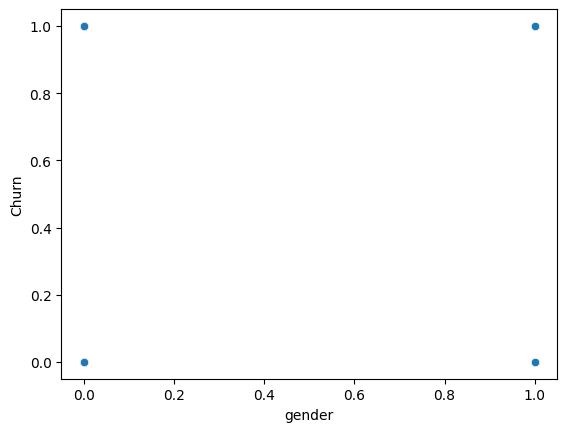

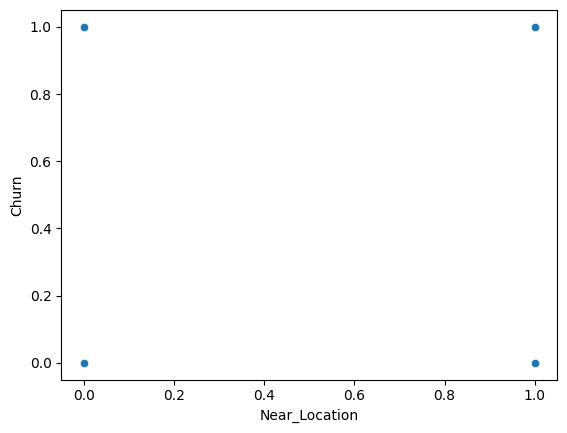

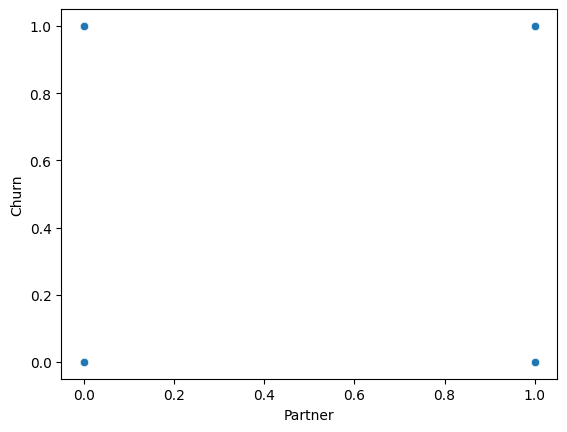

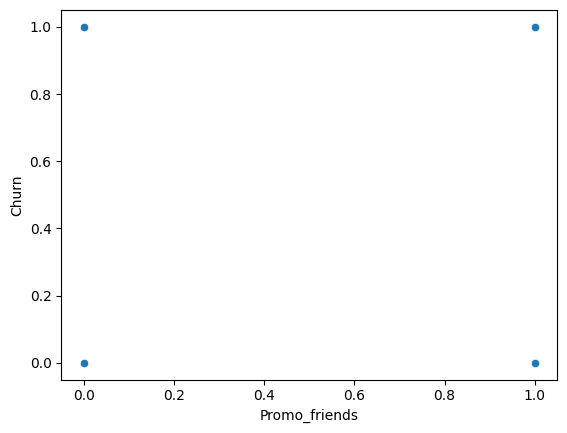

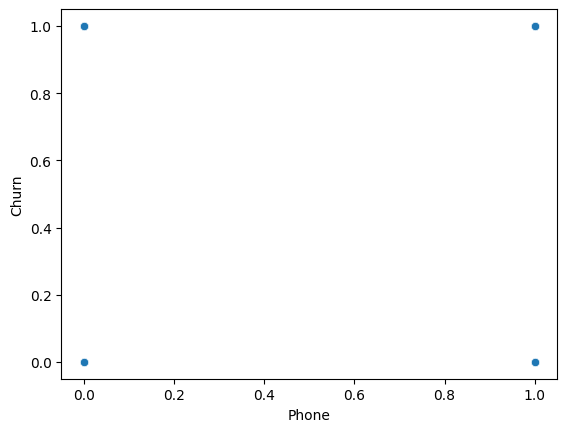

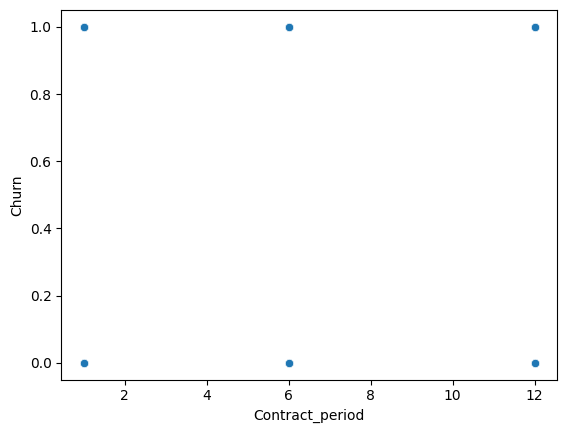

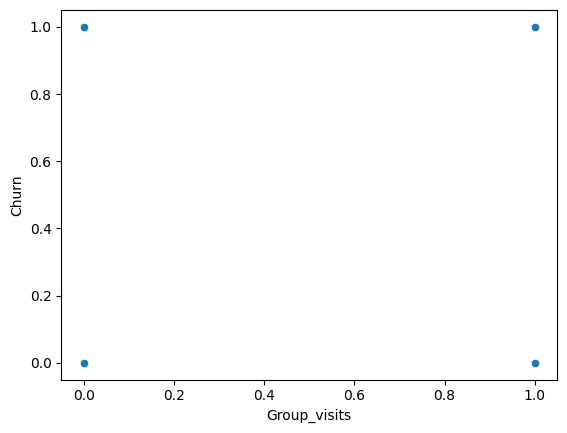

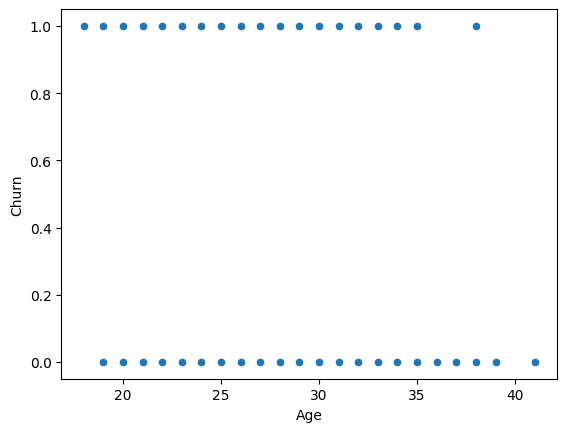

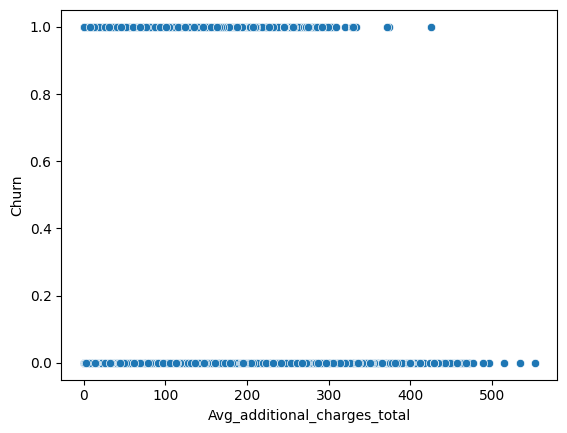

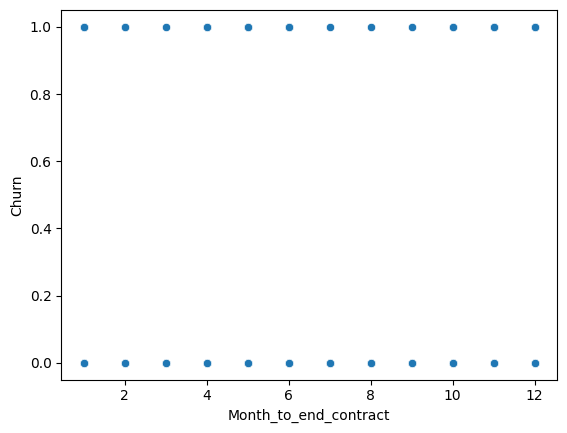

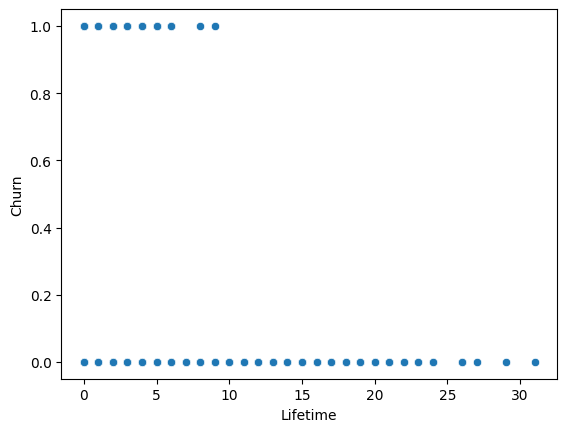

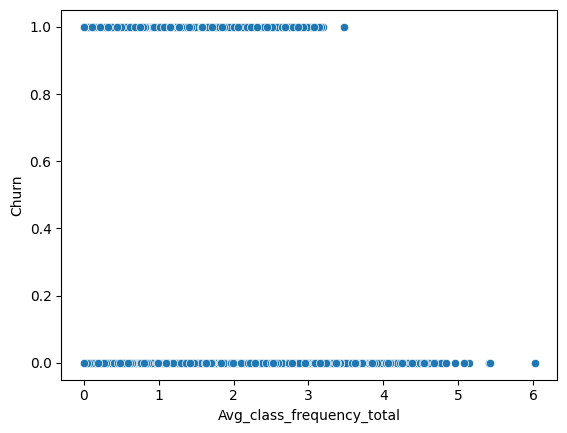

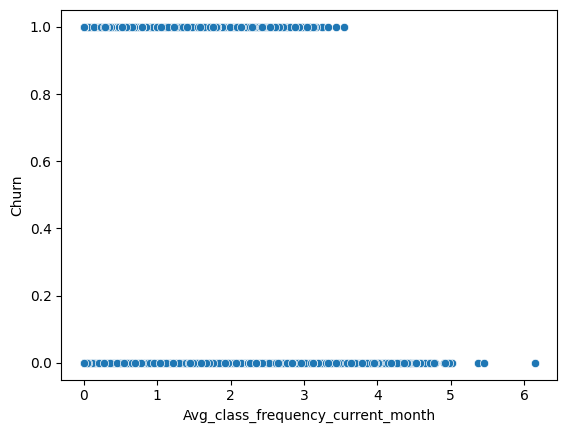

In [3]:



for col in churn.drop('Churn', axis=1).columns:
    sns.scatterplot(x=churn[col], y=churn['Churn'])# escribe tu código aquí
    #sns.histplot(churn[col], bins=100)
    plt.show()



### Trazado de histogramas de barras de clientes activos y cancelados ###

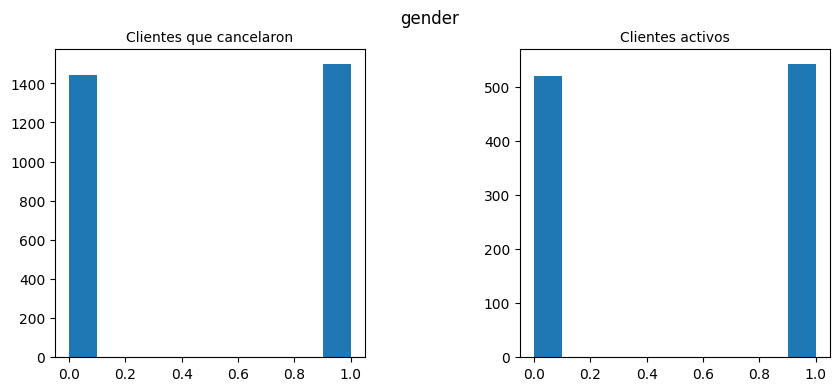

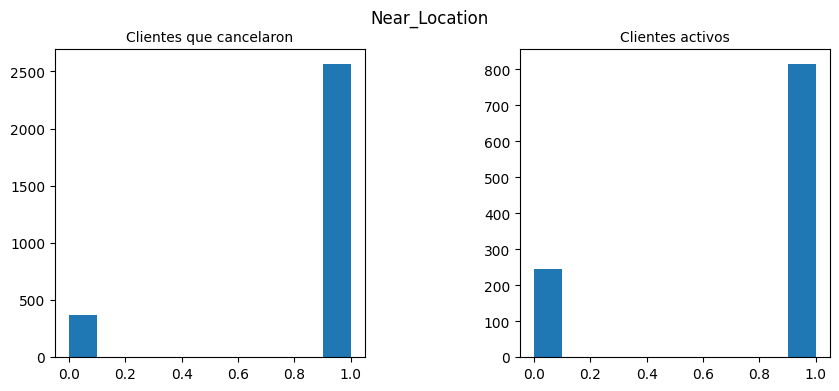

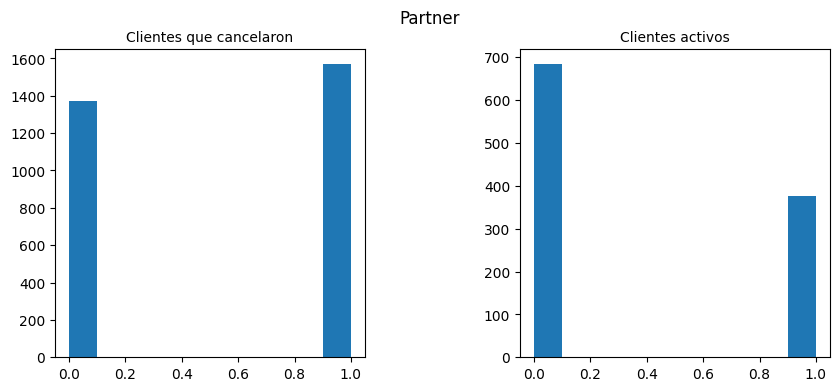

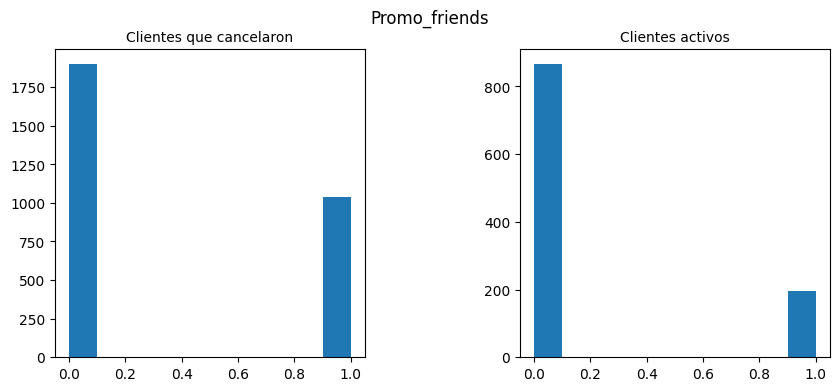

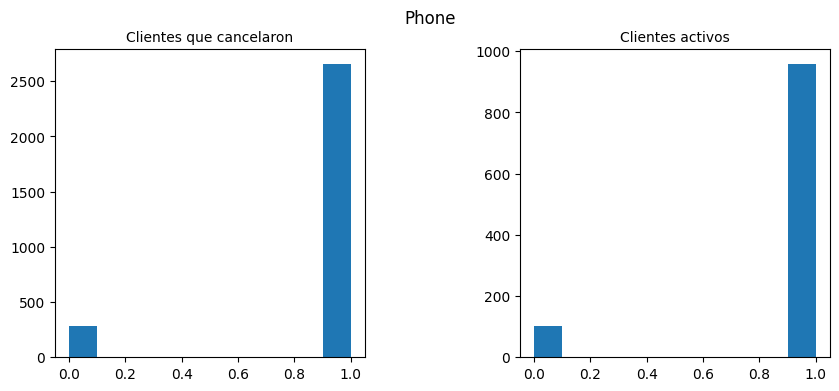

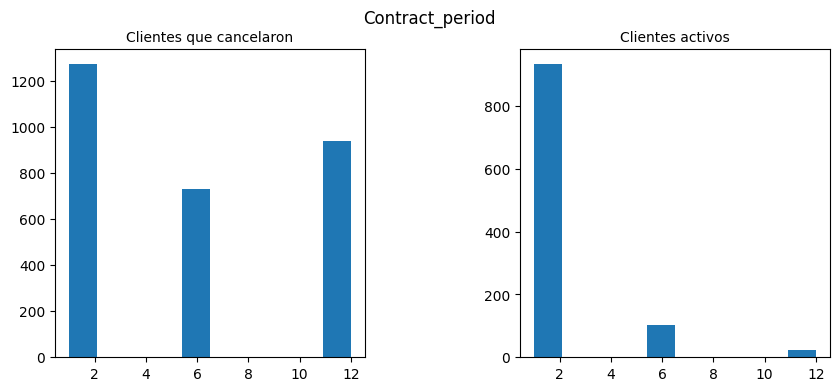

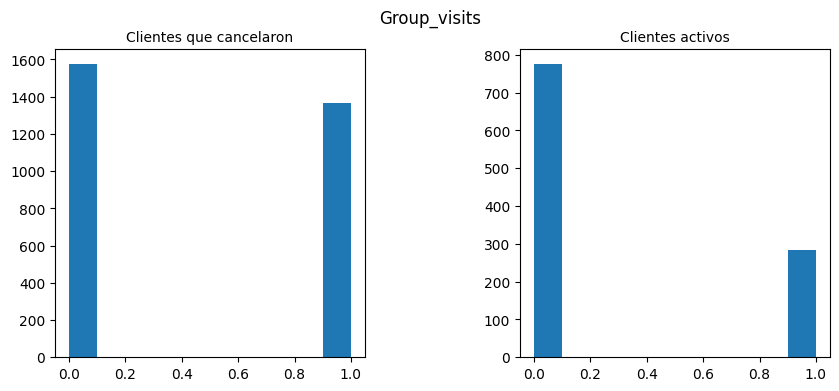

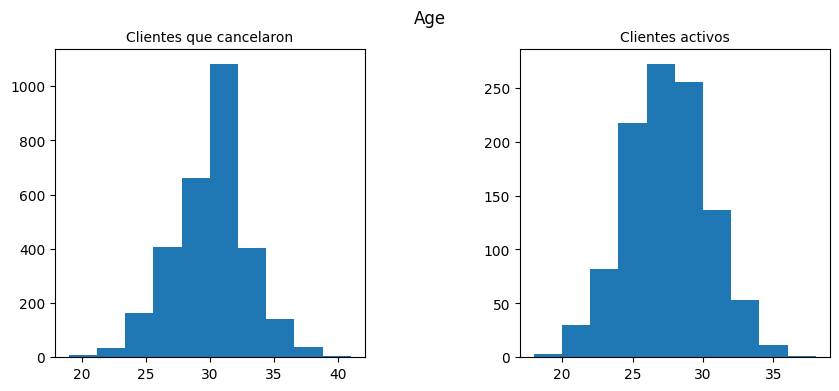

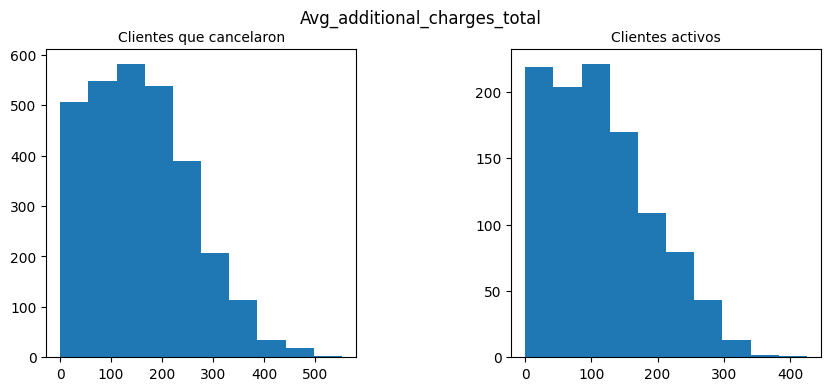

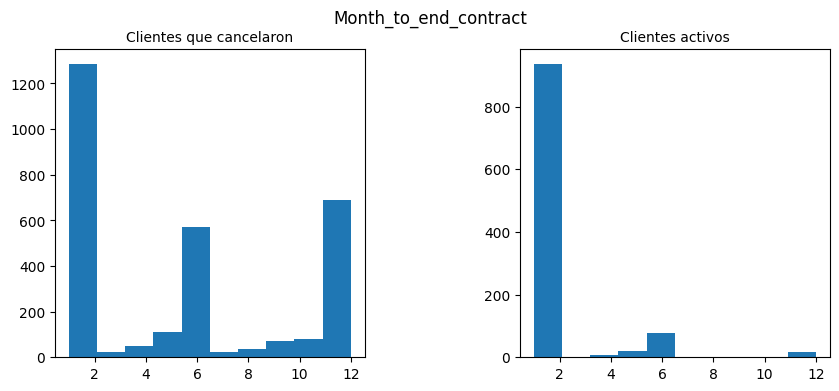

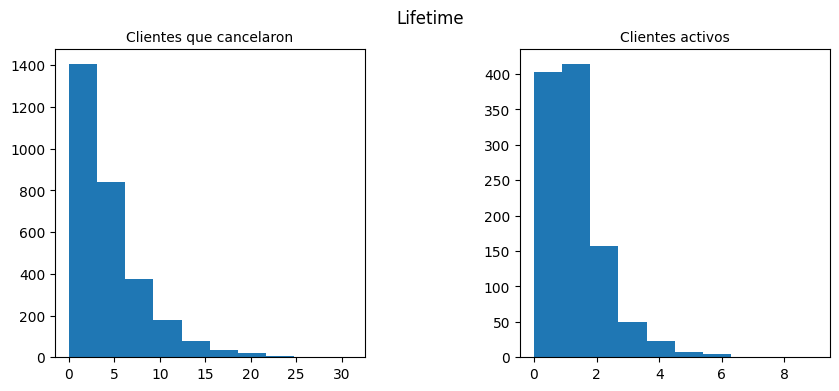

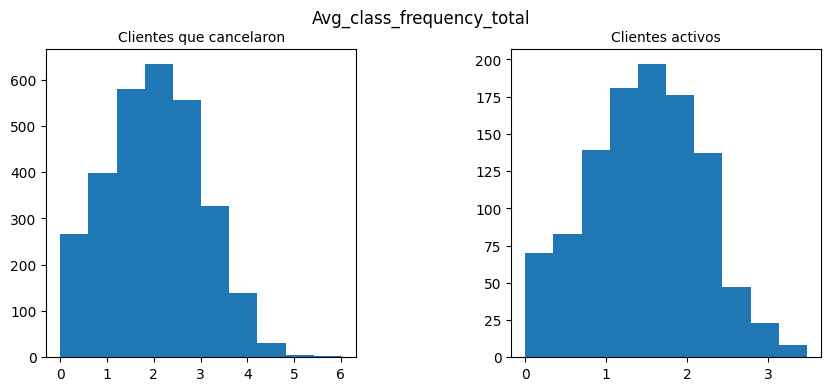

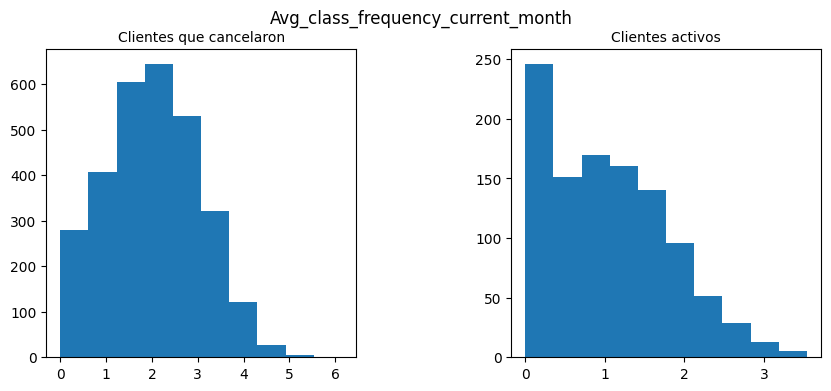

In [4]:
churn_customers = churn[churn['Churn'] == 0]
active_customers = churn[churn['Churn'] == 1] 


for col1 in churn.drop('Churn', axis=1).columns:
    fig, axs = plt.subplots(1, 2, figsize = (10,4))
    axs[0].hist(churn_customers[col1])
    axs[0].set_title('Clientes que cancelaron', fontsize=10)
    
    axs[1].hist(active_customers[col1])
    axs[1].set_title('Clientes activos', fontsize=10)
    
    fig.subplots_adjust(wspace=0.5, hspace=1)
    plt.suptitle(col1)
    plt.show()

Observando el histograma, tenemos información intereseante a primera vista de los clientes que cancelaron y los que siguen activos. Vemos que la proporción de cancelaciones y de estados activos son prácticamente iguales para hombres y mujeres, y que los clientes que cancelaron han sido muchos los que viven cerca del gimnasio. Esto puede deberse a que prefieren un gimnasio cerca de su lugar de trabajo para evitar el tráfico que se genera en el trayecto a su vecindario. 

Algo interesante es que los clientes que cancelaron tenían promociones o descuentos por trabajar en una empresa asociada, lo cual es curioso ya que debería de ser al revés por tener más descuentos y promociones. 

Vemos que hay muchas cancelaciones en comparación con los usuarios activos, casi un 75% de cancelaciones por mes. Sin embargo, algo a resaltar es que los usuarios activos en su mayoría son los que tienen contratos de la membresía por 1 mes y ningún cliente activo ni con cancelación optaron por la membresía de 3 meses.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

                                   gender  Near_Location  Partner  \
gender                               1.00           0.01    -0.01   
Near_Location                        0.01           1.00    -0.01   
Partner                             -0.01          -0.01     1.00   
Promo_friends                       -0.01           0.21     0.45   
Phone                               -0.01          -0.02     0.01   
Contract_period                      0.00           0.15     0.31   
Group_visits                         0.02           0.15     0.02   
Age                                  0.01           0.06     0.05   
Avg_additional_charges_total        -0.01           0.04     0.02   
Month_to_end_contract               -0.00           0.14     0.29   
Lifetime                             0.01           0.07     0.06   
Avg_class_frequency_total            0.01           0.04     0.02   
Avg_class_frequency_current_month    0.01           0.06     0.05   
Churn                             

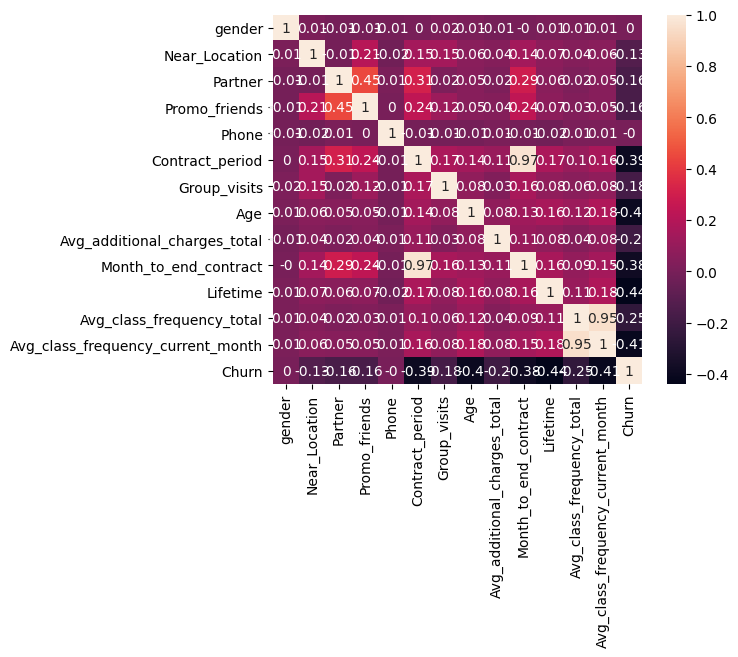

In [5]:
cm = churn.corr()
rounded_corr = cm.round(decimals = 2)
print(rounded_corr)
fig, ax = plt.subplots()#

sns.heatmap(rounded_corr, annot=True, square = True)# escribe tu código aquí
ax.set_ylim(14, 0) # corrige los campos "irregulares" del mapa de calor en la última versión de la librería
plt.show()

Al aplicar la correlación en las garacterísticas del Dataframe, no vemos uno de ellas que esté fuertmente relacionada con las cancelaciones de los clientes, ya que la columna de Churn tiene números por debajo de 0 con las demás columnas. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## Construir un modelo para predecir la cancelación de usuario ##

In [6]:
# Función para generar muestras numéricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# División de datos 80/20
X = churn.drop(columns = ['Churn'])
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Estandarizar y entrenamiento del escalador
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# Aplicar estandarización para los datos de prueba
X_test_st = scaler.transform(X_test)

# Método de regresión logística
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# Llama a la función
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

# Método de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# Llama a la función
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Métricas de random forest:')

Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Ambos métodos, tanto el de Regresión Logística como el de Bosque Aleatorio, arrojaron resultados similares al finalizar el entrenamiento, sin embargo, por muy poco es que obtuvo mejores resultados la regresión logística, por lo que este método sería el modelo que más nos ayudaría a predecir las cancelaciones de clientes del gimnasio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

### Crear clústeres de usuarios/as ###

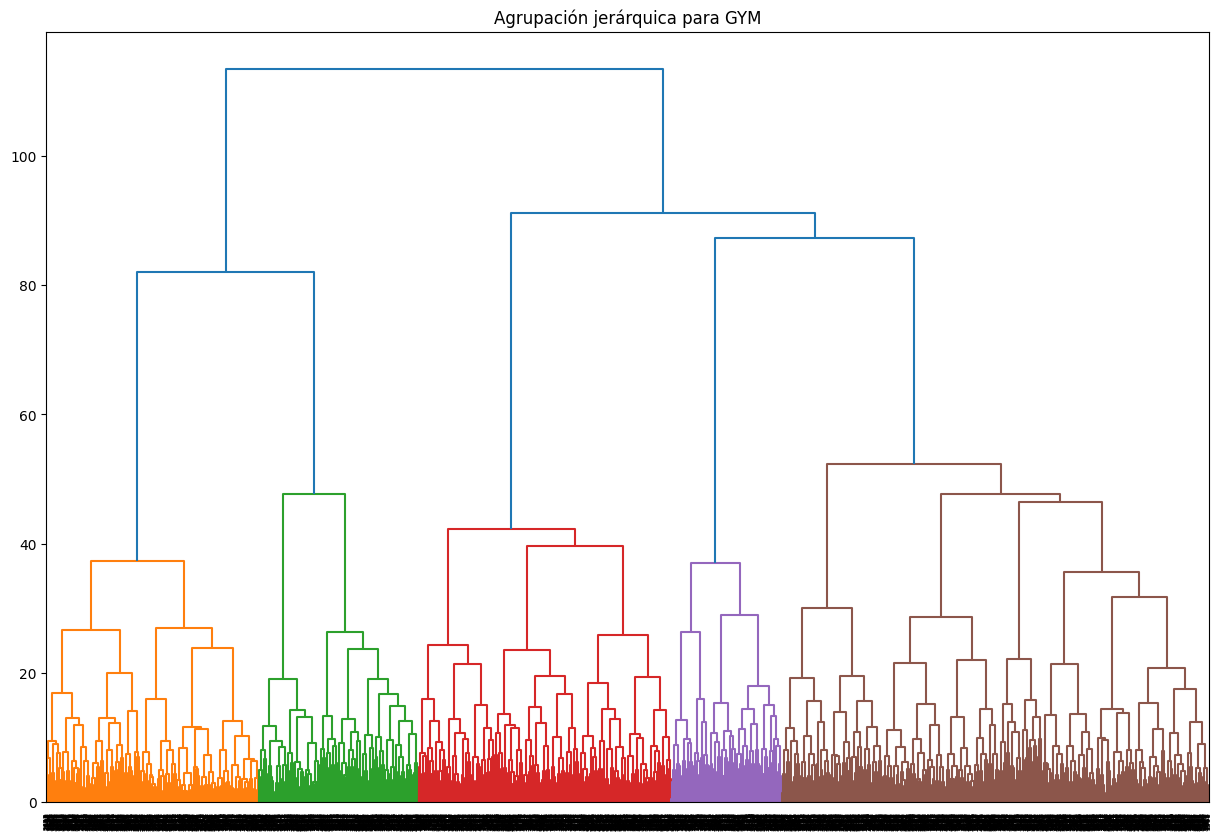

In [7]:
# Estandarización 
sc = StandardScaler()
churn_sc = sc.fit_transform(churn)

linked = linkage(churn_sc, method = 'ward')

# Renderización del dendrograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

De acuerdo al dendrograma, el número de clústeres para destacar son 5, que es la cantidad de colores que vemos en el gráfico.

In [8]:


# estandariza los datos
sc = StandardScaler()
x_sc = sc.fit_transform(churn)

km = KMeans(n_clusters=5, random_state = 0)

labels = km.fit_predict(x_sc)

churn['cluster_km'] = labels

print(churn.groupby(['cluster_km']).mean())

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.503676       0.000000  0.459559       0.075368  0.917279   
1           0.492829       0.936115  0.764016       0.534550  0.919166   
2           0.507917       1.000000  0.323995       0.213155  0.903776   
3           0.521186       0.996610  0.282203       0.208475  0.904237   
4           0.518895       0.968023  0.744186       0.526163  0.873547   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  2.069853      0.211397  28.522059   
1                 10.447197      0.516297  29.962190   
2                  1.546894      0.287454  26.926918   
3                  1.882203      0.452542  30.237288   
4                  8.859012      0.534884  29.728198   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

Observando los valores medios de los clústers, los del clúster 0 prácticamente todos son clientes que cancelarán o cancelaron su membresía del gimnasio, ya que son también el grupo que en cada una de las características, menos promedios tienen en comparación con los demás clústeres, lo que confirma prácticamente que estos son los que cancelarán el próximo mes.

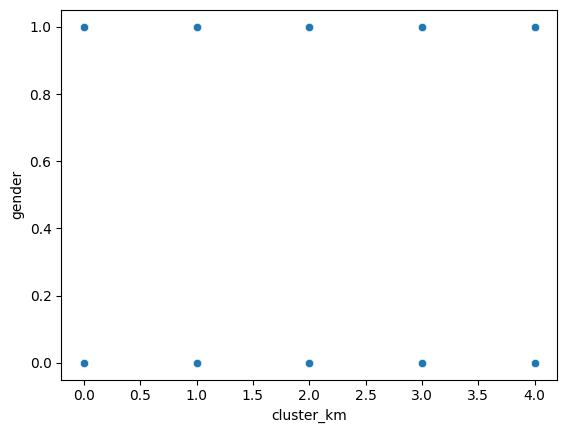

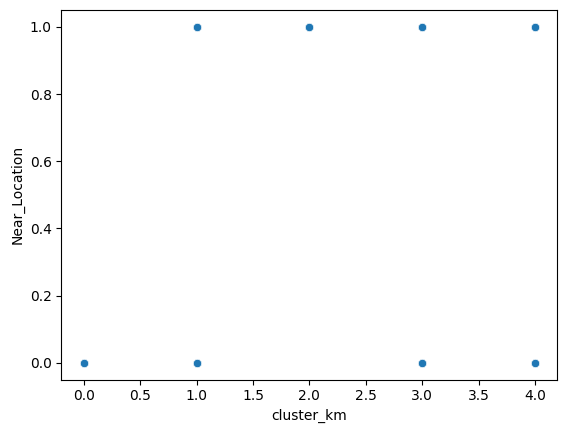

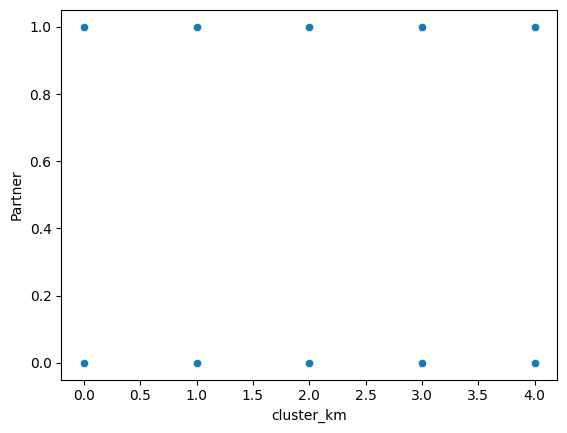

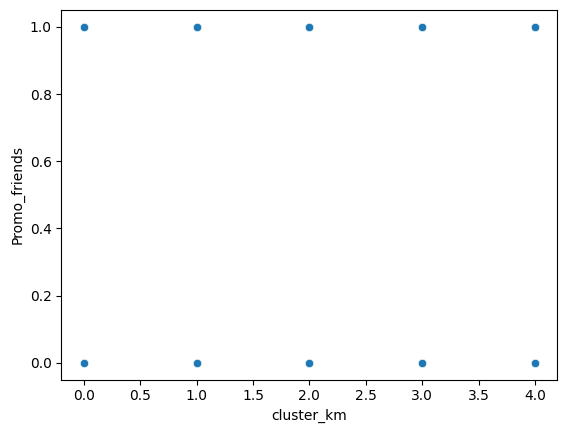

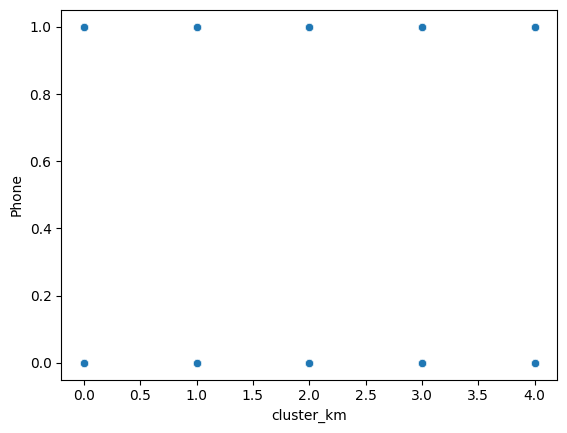

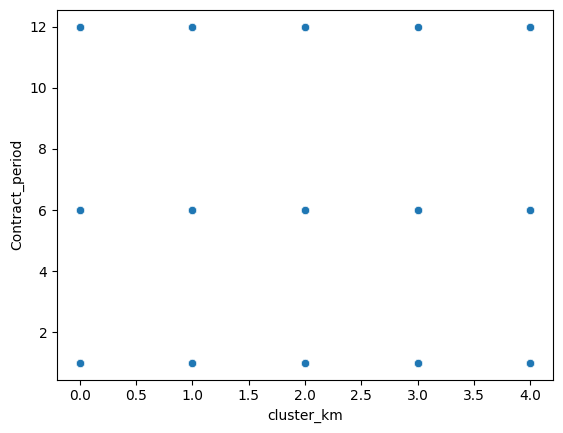

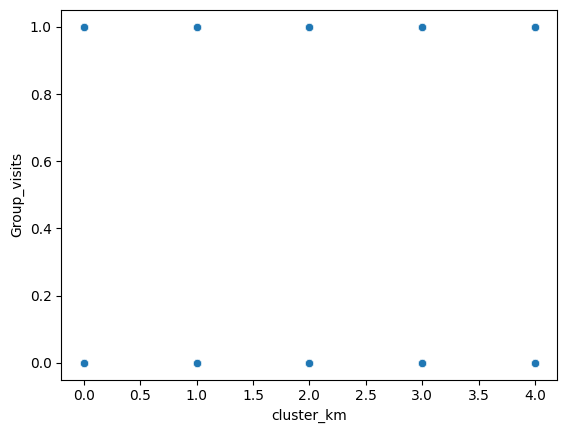

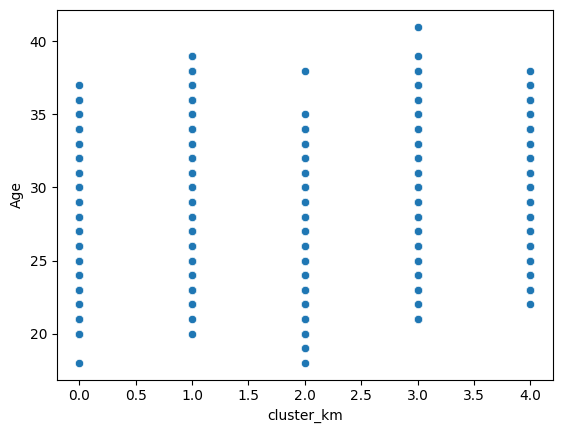

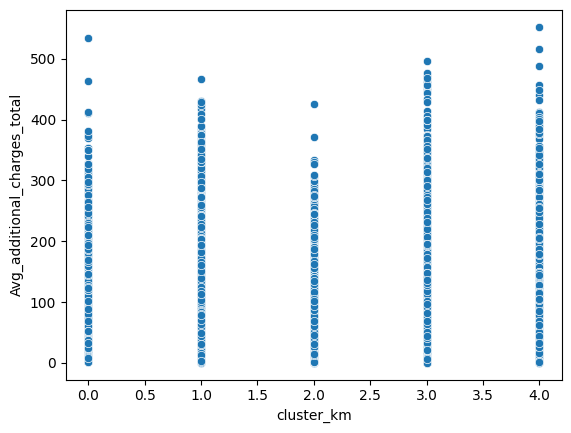

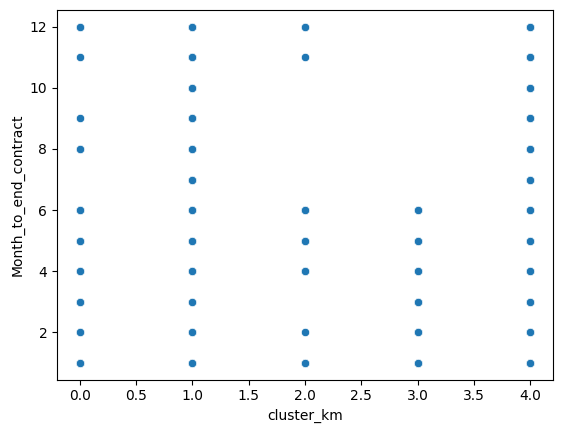

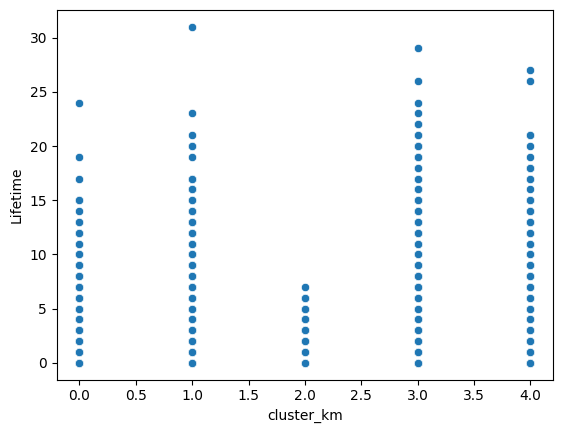

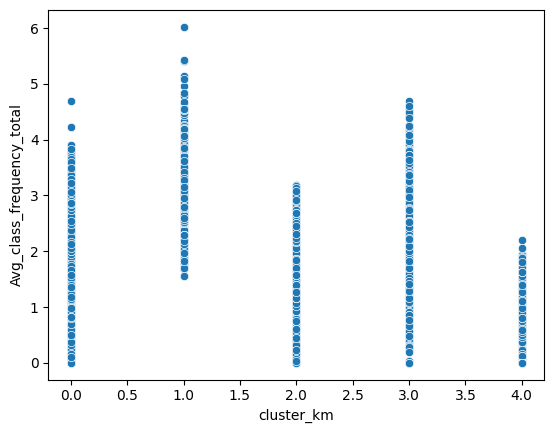

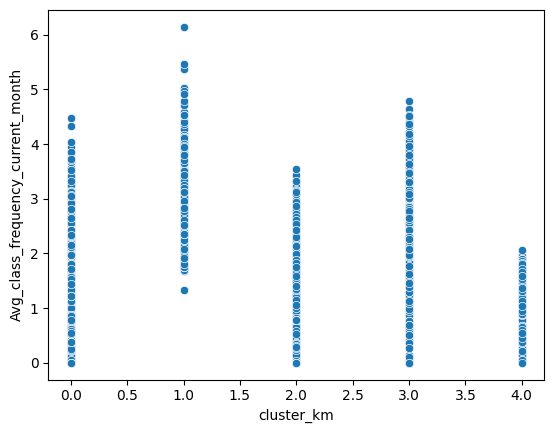

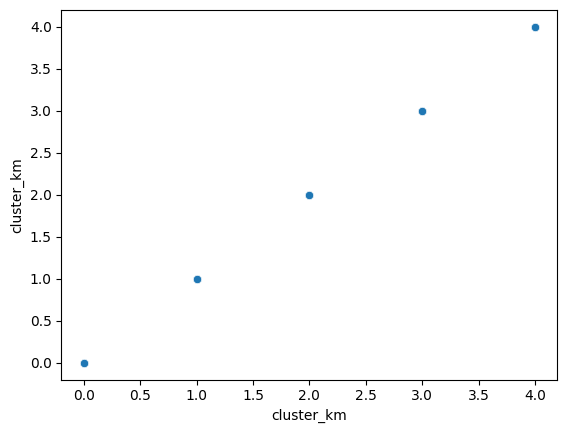

In [9]:
for col2 in churn.drop('Churn', axis=1).columns:
    sns.scatterplot(x=churn['cluster_km'], y=churn[col2])# escribe tu código aquí
    plt.show()

Las distribuciones de características nos indica que el clúster 0 está conformado por personas más jóvenes que los otros clústers y los que menos gastan dinero en otros servicios del gimnasio. En cambio, los del clúster 1, son los que menos veces a la semana y al mes asisten al gimnasio, sin embargo, son los menos propensos a cancelar su membresía

In [10]:
churn_ratio = (churn.groupby('cluster_km').agg({'Churn' : 'sum'})['Churn'] / churn.groupby('cluster_km').agg({'Churn' : 'count'})['Churn']) * 100 #/ churn.groupby('cluster_km').size() 

print(churn_ratio)

cluster_km
0    45.036765
1     0.782269
2    96.102314
3     0.338983
4     2.470930
Name: Churn, dtype: float64


Hay una diferencia muy marcada en los grupos en lo que a la retención del gimnasio se refiere. Los del clúster 0 son los más propensos a irse, seguidos del clúster 4. Los del grupo 1,2,3 son los clientes más leales.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

## Conclusión ## 

Analizando los datos obtenidos, observamos que los clientes más jóvenes son los más propensos a irse, por lo que se sugiere crear un tipo de incentivo para los que tengan una edad menor a las personas que son propensos a ser leales, alrededor de los 35-37 años, como descuentos en los precios de las membresías nuevas y también descuentos en las actividades u otros servicios del gimnasio, ya que se observó que las personas que más han gastado en dichos servicios son personas que se consideran leales y renovarán membresía en el gimnasio. 

Aprovechando los descuentos, al hacer que agarre una membresía con mayor plazo, se puede lograr cruzar el umbral en el que el cliente ya sería leal, ya que muy pocos clientes de los propensos a cancelar pasan del umbral de los 6 meses, por lo que ofreciendo un muy buen descuento por la membresía de 12 meses, aunado con los incentivos anteriores, se podría lograr la retención de clientes. 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Las conclusiones en cada sección quedaron impecables dejando un proceso de análisis súper claro de inicio a fin, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>